# Path Notebook

# It executes the _setup.py file

In your case (based on the content you shared earlier), _setup.py is usually used to:
- Adjust the PYTHONPATH
- Add the project’s /src folder to the import path
- Configure logging
- Allow imports

In [6]:
%run _setup.py

2026-02-07 23:08:25,896 | INFO | __main__ | Project root detected at: C:\Users\User\Desktop\covid-19\data-science-machine-learning-for-covid-19-using-Python-v2
2026-02-07 23:08:25,914 | INFO | __main__ | SRC path detected at: C:\Users\User\Desktop\covid-19\data-science-machine-learning-for-covid-19-using-Python-v2\src
2026-02-07 23:08:25,928 | INFO | __main__ | PYTHONPATH successfully configured


# Path Ingestion

# Data Loading and Initial Exploration

This cell is responsible for loading the raw COVID-19 dataset into a Pandas DataFrame and performing a first inspection of the data.

# What this code does:
- Imports **Pandas** for data manipulation and analysis.
- Uses the custom **DataLoader** class to standardize data ingestion.
- Loads a CSV file from the **raw data layer**, following a data lake / data pipeline structure.
- Stores the dataset in a DataFrame (`df`) for further processing and analysis.
- Displays the first rows of the dataset to verify successful loading and inspect the schema.

# Output:
- A preview of the dataset (`df.head()`), showing column names, data types, and sample records.


In [7]:
import pandas as pd
from ingestion.data_loader import DataLoader

loader = DataLoader()
df = loader.load_csv(
    filename="corona_tested_individuals_ver_0083.english.csv",
    layer="raw"
)

df.head()

2026-02-07 23:08:26,452 | INFO | ingestion.data_loader | Project root resolvido em: C:\Users\User\Desktop\covid-19\data-science-machine-learning-for-covid-19-using-Python-v2
2026-02-07 23:08:26,456 | INFO | ingestion.data_loader | Data root resolvido em: C:\Users\User\Desktop\covid-19\data-science-machine-learning-for-covid-19-using-Python-v2\data
2026-02-07 23:08:26,461 | INFO | ingestion.data_loader | Carregando dados de: C:\Users\User\Desktop\covid-19\data-science-machine-learning-for-covid-19-using-Python-v2\data\raw\corona_tested_individuals_ver_0083.english.csv
2026-02-07 23:08:26,879 | INFO | ingestion.data_loader | Dados carregados com sucesso | shape=(158606, 10)


,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed


# Data Overview

# Model Predictors and Exact Variable Names (True = 1, False = 0)
* **Age over 60** - Age_60_and_above
* **Sex** - Male (Male=1, Female=0)
* **Cough** - Cough
* **Shortness of breath** - Shortness_of_breath
* **Fever** - Fever
* **Sore throat** - Sore_throat
* **Headache** - Headache
* **Test Indication** - Important thing in this is whether the patient contacted with a confirmed patient or not

Source: https://data.gov.il/dataset/covid-19

# Path Processing

# Data Cleaning – Handling Missing Values

This cell performs a data cleaning step focused on removing missing values from the dataset.

# What this code does:
- Imports the **DataCleaner** class, responsible for standardized data cleaning operations.
- Instantiates the cleaner using an object-oriented approach.
- Removes rows containing missing values to ensure data quality and consistency.
- Logs the dataset shape before and after cleaning for traceability and reproducibility.
- Displays the first rows of the cleaned DataFrame to validate the operation.

# Output:
- A cleaned DataFrame with no missing values, ready for feature engineering and modeling.


In [8]:
from processing.data_cleaner import DataCleaner
cleaner = DataCleaner()
df = cleaner.drop_missing_values(df)

df.head()

2026-02-07 23:08:27,107 | INFO | DataCleaner | Initial DataFrame shape: (158606, 10)
2026-02-07 23:08:27,194 | INFO | DataCleaner | Final DataFrame shape after dropna: (143502, 10)
2026-02-07 23:08:27,196 | INFO | DataCleaner | Rows removed: 15104


,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed


# Feature Encoding (Categorical to Numerical)

This cell applies feature encoding to transform categorical variables into numerical representations required for machine learning models.

# What this code does:
- Imports the **FeatureEncoder** class, responsible for centralized and reusable feature transformations.
- Instantiates the encoder following an object-oriented design.
- Encodes categorical columns (such as gender, age group, test indication, and COVID-19 result) into binary numerical values using optimized, vectorized operations.
- Ensures consistent and reproducible feature engineering across the entire data pipeline.
- Displays the first rows of the encoded dataset to validate the transformations.

# Output:
- A DataFrame with encoded features, ready for exploratory analysis and model training.


In [9]:
from processing.feature_encoder import FeatureEncoder

encoder = FeatureEncoder()
df = encoder.encode(df)

df.head()


2026-02-07 23:08:27,441 | INFO | FeatureEncoder | Starting feature encoding process
2026-02-07 23:08:27,458 | INFO | FeatureEncoder | Encoding gender column
2026-02-07 23:08:27,526 | INFO | FeatureEncoder | Encoding age_60_and_above column
2026-02-07 23:08:27,545 | INFO | FeatureEncoder | Encoding corona_result column
2026-02-07 23:08:27,604 | INFO | FeatureEncoder | Encoding contact_with_confirmed column
2026-02-07 23:08:27,625 | INFO | FeatureEncoder | Feature encoding completed successfully


,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,contact_with_confirmed
0,2020-11-12,0,0,0,0,0,0,0,1,Other,0
1,2020-11-12,0,1,0,0,0,0,0,1,Other,0
2,2020-11-12,0,0,0,0,0,0,1,0,Other,0
3,2020-11-12,0,0,0,0,0,0,0,1,Other,0
4,2020-11-12,0,1,0,0,0,0,0,1,Contact with confirmed,1


# Path Pipeline

# Machine Learning Pipeline Execution

This cell executes the end-to-end machine learning pipeline using a structured and modular architecture.

# What this code does:
- Imports the **MLPipeline** class, which orchestrates all stages of the machine learning workflow.
- Instantiates the pipeline following best practices for reproducibility and scalability.
- Runs the complete pipeline using the prepared DataFrame as input.
- Performs data splitting, preprocessing, model training, and evaluation through an integrated trainer component.
- Returns a trained model object (trainer) containing the results and artifacts of the training process.

# Output:
- A trained machine learning model and related training metadata, ready for evaluation, validation, or deployment.


In [10]:
from pipeline.ml_pipeline import MLPipeline

pipeline = MLPipeline()
trainer = pipeline.run_with_trainer(df)

2026-02-07 23:08:31,333 | INFO | preprocessing.feature_selector | Selecionando features e target
2026-02-07 23:08:31,354 | INFO | preprocessing.feature_selector | Seleção concluída | X shape=(143502, 8) | y shape=(143502,)
2026-02-07 23:08:31,355 | INFO | preprocessing.feature_selector | Features utilizadas: ['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'age_60_and_above', 'gender', 'contact_with_confirmed']
2026-02-07 23:08:31,360 | INFO | training.trainer | Target validado | Classes encontradas: [0 1]
2026-02-07 23:08:31,361 | INFO | training.trainer | Iniciando split de treino e teste (estratificado)
2026-02-07 23:08:31,519 | INFO | training.trainer | Distribuição de classes no treino: Counter({0: 111390, 1: 3411})
2026-02-07 23:08:31,528 | INFO | training.trainer | Distribuição de classes no teste: Counter({0: 27848, 1: 853})
2026-02-07 23:08:31,530 | INFO | training.trainer | Inicializando GradientBoostingClassifier
2026-02-07 23:08:31,532 | INFO | training

# Model Evaluation and Performance Metrics

This cell evaluates the performance of the trained machine learning model using standardized evaluation metrics.

# What this code does:
- Imports the **ModelEvaluator** class, responsible for centralized and reusable model evaluation logic.
- Instantiates the evaluator following a modular and object-oriented design.
- Generates predictions on the test dataset using the trained model stored in the trainer object.
- Compares predicted values against the true labels from the test set.
- Computes evaluation metrics to quantitatively assess model performance.

# Output:
- A set of performance metrics (e.g., accuracy, precision, recal


In [11]:
from evaluation.evaluator import ModelEvaluator

evaluator = ModelEvaluator()

y_pred = trainer.model.predict(
    trainer.X_test
)

metrics = evaluator.evaluate_metrics(
    y_true=trainer.y_test,
    y_pred=y_pred
)

metrics


2026-02-07 23:08:44,555 | INFO | evaluation.evaluator | Calculando métricas de avaliação


{'accuracy': 0.9797568028988537,
 'precision': 0.8451776649746193,
 'recall': 0.3903868698710434,
 'f1_score': 0.5340817963111467}

# Classification Report

This cell generates a detailed classification report to analyze the performance of the trained model for each target class.

# What this code does:
- Uses the **ModelEvaluator** class to compute a detailed classification report.
- Compares the model predictions with the true labels from the test dataset.
- Calculates class-wise metrics such as precision, recall, F1-score, and support.
- Maps numerical class labels to human-readable class names (`Negative`, `Positive`) for better interpretability.
- Prints the classification report for inspection and analysis.

# Output:
- A textual classification report summarizing the model’s performance for each class and overall averages.


In [12]:
report = evaluator.classification_report(
    y_true=trainer.y_test,
    y_pred=y_pred,
    target_names=["Negative", "Positive"]
)

print(report)

2026-02-07 23:08:44,604 | INFO | evaluation.evaluator | Gerando classification report


              precision    recall  f1-score   support

    Negative       0.98      1.00      0.99     27848
    Positive       0.85      0.39      0.53       853

    accuracy                           0.98     28701
   macro avg       0.91      0.69      0.76     28701
weighted avg       0.98      0.98      0.98     28701



# Confusion Matrix Visualization

This cell visualizes the confusion matrix to provide an intuitive and interpretable overview of the model’s classification performance.

# What this code does:
- Uses the **ModelEvaluator** class to compute and plot the confusion matrix.
- Compares predicted labels against the true labels from the test dataset.
- Organizes results by class (`Negative`, `Positive`) to highlight correct and incorrect predictions.
- Displays a graphical representation of true positives, true negatives, false positives, and false negatives.
- Supports qualitative analysis of model strengths and weaknesses.

# Output:
- A confusion matrix plot that visually summarizes the classification results and error distribution.


2026-02-07 23:08:44,650 | INFO | evaluation.evaluator | Plotando matriz de confusão


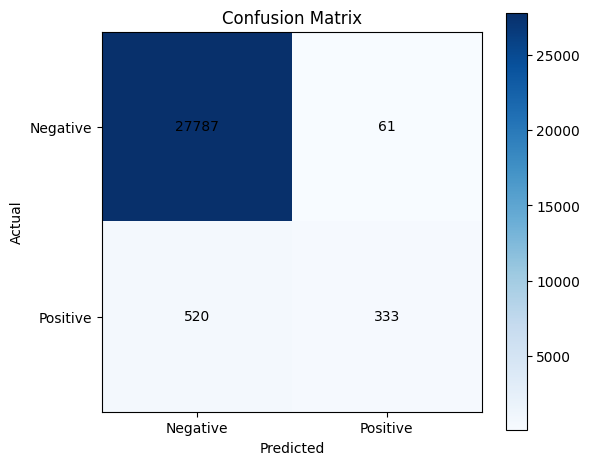

In [13]:
evaluator.plot_confusion_matrix(
    y_true=trainer.y_test,
    y_pred=y_pred,
    labels=["Negative", "Positive"]
)

# ROC Curve and AUC Analysis

This cell plots the Receiver Operating Characteristic (ROC) curve to evaluate the model’s ability to discriminate between classes.

# What this code does:
- Uses the **ModelEvaluator** class to generate the ROC curve.
- Computes prediction scores or probabilities from the trained model.
- Compares the true positive rate (TPR) against the false positive rate (FPR) across different decision thresholds.
- Calculates and visualizes the Area Under the Curve (AUC) as a summary performance metric.
- Provides insight into the trade-off between sensitivity and specificity.

# Output:
- A ROC curve plot with the corresponding AUC value, illustrating the model’s classification performance across thresholds.


2026-02-07 23:08:45,031 | INFO | evaluation.evaluator | Plotando curva ROC


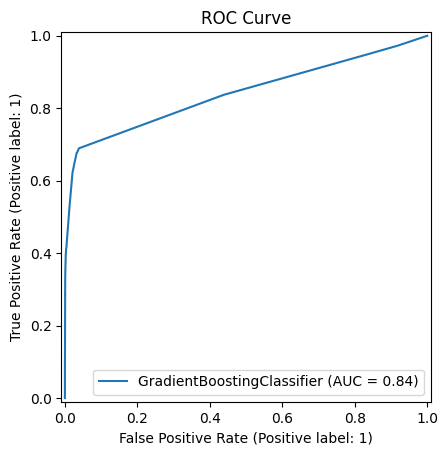

In [14]:
evaluator.plot_roc_curve(
    model=trainer.model,
    X_test=trainer.X_test,
    y_true=trainer.y_test
)

# Path Preprocessing

# Random Undersampling

# Python imbalanced-learn module
A number of more sophisticated resapling techniques have been proposed in the scientific literature.

For example, we can cluster the records of the majority class, and do the under-sampling by removing records from each cluster, thus seeking to preserve information. In over-sampling, instead of creating exact copies of the minority class records, we can introduce small variations into those copies, creating more diverse synthetic samples.

# Handling Class Imbalance with Random Undersampling

This cell applies a random undersampling strategy to address class imbalance in the training dataset.

# What this code does:
- Imports the utility function responsible for applying **random undersampling** based on the trained pipeline context.
- Extracts the training features and labels from the trainer object.
- Reduces the majority class by randomly removing samples, creating a more balanced class distribution.
- Returns the balanced feature matrix (`X_balanced`) and target vector (`y_balanced`).
- Displays the class distribution after undersampling to verify the effectiveness of the balancing process.

# Output:
- A balanced target distribution, improving model fairness and reducing bias toward the majority class.


In [15]:
from preprocessing.apply_random_undersampling import (
    apply_random_undersampling_from_trainer
)

X_balanced, y_balanced = apply_random_undersampling_from_trainer(trainer)
y_balanced.value_counts()

2026-02-07 23:08:45,993 | INFO | preprocessing.apply_random_undersampling | Iniciando RandomUnderSampler a partir do trainer
2026-02-07 23:08:46,041 | INFO | preprocessing.apply_random_undersampling | RandomUnderSampler aplicado | antes=114801 | depois=6822


corona_result
0    3411
1    3411
Name: count, dtype: int64

# Model Training with Balanced Dataset

This cell trains a machine learning model using a class-balanced dataset obtained through random undersampling.

# What this code does:
- Imports the **ModelTrainer** class, responsible for model training and experiment management.
- Imports the **ModelConfig** configuration object, which centralizes model hyperparameters and settings.
- Instantiates a new trainer using the defined configuration.
- Trains the model using the balanced feature matrix (`X_balanced`) and target vector (`y_balanced`).
- Produces a trained model that is less biased toward the majority class.

# Output:
- A trained machine learning model fitted on a balanced dataset, ready for evaluation and comparison with the original model.

In [16]:
from training.trainer import ModelTrainer
from config.settings import ModelConfig

balanced_trainer = ModelTrainer(ModelConfig())
balanced_trainer.train(X_balanced, y_balanced)

2026-02-07 23:08:46,058 | INFO | training.trainer | Target validado | Classes encontradas: [0 1]
2026-02-07 23:08:46,060 | INFO | training.trainer | Iniciando split de treino e teste (estratificado)
2026-02-07 23:08:46,072 | INFO | training.trainer | Distribuição de classes no treino: Counter({1: 2729, 0: 2728})
2026-02-07 23:08:46,074 | INFO | training.trainer | Distribuição de classes no teste: Counter({0: 683, 1: 682})
2026-02-07 23:08:46,075 | INFO | training.trainer | Inicializando GradientBoostingClassifier
2026-02-07 23:08:46,078 | INFO | training.trainer | Treinando modelo
2026-02-07 23:08:47,021 | INFO | training.trainer | Treinamento concluído com sucesso


(        cough  fever  sore_throat  shortness_of_breath  head_ache  \
 13246       1      0            0                    0          0   
 18306       0      0            0                    0          0   
 36823       0      0            0                    0          0   
 132479      0      0            0                    0          0   
 64886       0      0            0                    0          0   
 ...       ...    ...          ...                  ...        ...   
 13381       0      0            0                    0          0   
 110534      0      0            0                    0          0   
 113952      1      0            0                    0          0   
 29423       0      0            0                    0          0   
 106126      0      0            0                    0          0   
 
         age_60_and_above  gender  contact_with_confirmed  
 13246                  0       1                       1  
 18306                  0       1     

# Model Evaluation on Balanced Dataset

This cell evaluates the performance of the machine learning model trained on a balanced dataset.

# What this code does:
- Imports the **ModelEvaluator** class, responsible for computing standardized evaluation metrics.
- Instantiates the evaluator for model performance assessment.
- Generates predictions using the model trained on the balanced dataset.
- Compares predicted values with the true labels from the balanced test set.
- Computes evaluation metrics to assess model performance after class balancing.

# Output:
- A set of performance metrics that reflect the model’s behavior when trained on a balanced dataset, enabling comparison with the original (imbalanced) model.


In [17]:
from evaluation.evaluator import ModelEvaluator

evaluator = ModelEvaluator()

y_pred = balanced_trainer.model.predict(
    balanced_trainer.X_test
)

metrics = evaluator.evaluate_metrics(
    y_true=balanced_trainer.y_test,
    y_pred=y_pred
)

metrics


2026-02-07 23:08:47,055 | INFO | evaluation.evaluator | Calculando métricas de avaliação


{'accuracy': 0.8322344322344323,
 'precision': 0.9502982107355865,
 'recall': 0.7008797653958945,
 'f1_score': 0.8067510548523207}

# Classification Report

This cell generates a detailed classification report to analyze the performance of the trained model for each target class.

# What this code does:
- Uses the **ModelEvaluator** class to compute a detailed classification report.
- Compares the model predictions with the true labels from the test dataset.
- Calculates class-wise metrics such as precision, recall, F1-score, and support.
- Maps numerical class labels to human-readable class names (`Negative`, `Positive`) for better interpretability.
- Prints the classification report for inspection and analysis.

# Output:
- A textual classification report summarizing the model’s performance for each class and overall averages.


In [18]:
report = evaluator.classification_report(
    y_true=balanced_trainer.y_test,
    y_pred=y_pred,
    target_names=["Negative", "Positive"]
)

print(report)

2026-02-07 23:08:47,086 | INFO | evaluation.evaluator | Gerando classification report


              precision    recall  f1-score   support

    Negative       0.76      0.96      0.85       683
    Positive       0.95      0.70      0.81       682

    accuracy                           0.83      1365
   macro avg       0.86      0.83      0.83      1365
weighted avg       0.86      0.83      0.83      1365



# Confusion Matrix Visualization

This cell visualizes the confusion matrix to provide an intuitive and interpretable overview of the model’s classification performance.

# What this code does:
- Uses the **ModelEvaluator** class to compute and plot the confusion matrix.
- Compares predicted labels against the true labels from the test dataset.
- Organizes results by class (`Negative`, `Positive`) to highlight correct and incorrect predictions.
- Displays a graphical representation of true positives, true negatives, false positives, and false negatives.
- Supports qualitative analysis of model strengths and weaknesses.

# Output:
- A confusion matrix plot that visually summarizes the classification results and error distribution.


2026-02-07 23:08:47,115 | INFO | evaluation.evaluator | Plotando matriz de confusão


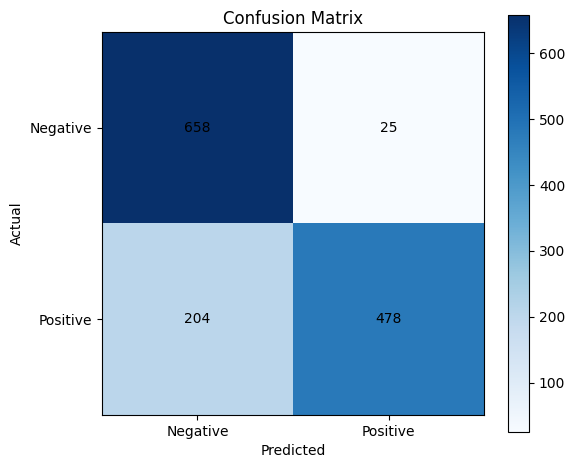

In [19]:
evaluator.plot_confusion_matrix(
    y_true=balanced_trainer.y_test,
    y_pred=y_pred,
    labels=["Negative", "Positive"]
)

# ROC Curve and AUC Analysis

This cell plots the Receiver Operating Characteristic (ROC) curve to evaluate the model’s ability to discriminate between classes.

# What this code does:
- Uses the **ModelEvaluator** class to generate the ROC curve.
- Computes prediction scores or probabilities from the trained model.
- Compares the true positive rate (TPR) against the false positive rate (FPR) across different decision thresholds.
- Calculates and visualizes the Area Under the Curve (AUC) as a summary performance metric.
- Provides insight into the trade-off between sensitivity and specificity.

# Output:
- A ROC curve plot with the corresponding AUC value, illustrating the model’s classification performance across thresholds.


2026-02-07 23:08:47,450 | INFO | evaluation.evaluator | Plotando curva ROC


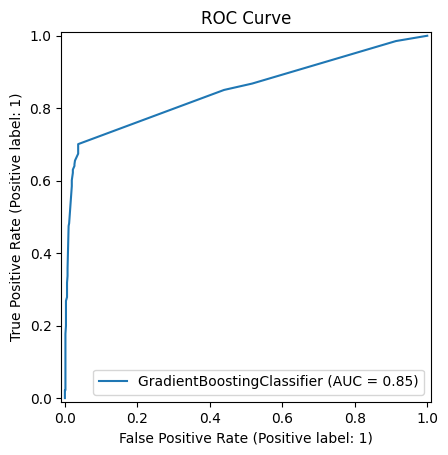

In [20]:
evaluator.plot_roc_curve(
    model=balanced_trainer.model,
    X_test=balanced_trainer.X_test,
    y_true=balanced_trainer.y_test
)

In [21]:
from preprocessing.apply_undersampling import apply_undersampling_from_trainer

X_balanced, y_balanced = apply_undersampling_from_trainer(trainer)

y_balanced.value_counts()


2026-02-07 23:08:47,705 | INFO | preprocessing.apply_undersampling | Iniciando under-sampling a partir do trainer
2026-02-07 23:08:47,707 | INFO | preprocessing.imbalance_handler | Aplicando ClusterCentroids under-sampling
C:\Users\User\Desktop\covid-19\data-science-machine-learning-for-covid-19-using-Python\.venv\Lib\site-packages\sklearn\base.py:1336: ConvergenceWarning: Number of distinct clusters (86) found smaller than n_clusters (3411). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
2026-02-07 23:09:55,311 | INFO | preprocessing.imbalance_handler | Under-sampling concluído | antes=114801 | depois=6822
2026-02-07 23:09:55,313 | INFO | preprocessing.apply_undersampling | Under-sampling aplicado com sucesso


corona_result
0    3411
1    3411
Name: count, dtype: int64

# Model Training with Balanced Dataset

This cell trains a machine learning model using a class-balanced dataset obtained through random undersampling.

# What this code does:
- Imports the **ModelTrainer** class, responsible for model training and experiment management.
- Imports the **ModelConfig** configuration object, which centralizes model hyperparameters and settings.
- Instantiates a new trainer using the defined configuration.
- Trains the model using the balanced feature matrix (`X_balanced`) and target vector (`y_balanced`).
- Produces a trained model that is less biased toward the majority class.

# Output:
- A trained machine learning model fitted on a balanced dataset, ready for evaluation and comparison with the original model.

In [22]:
from training.trainer import ModelTrainer
from config.settings import ModelConfig

balanced_trainer = ModelTrainer(ModelConfig())
balanced_trainer.train(X_balanced, y_balanced)


2026-02-07 23:09:55,332 | INFO | training.trainer | Target validado | Classes encontradas: [0 1]
2026-02-07 23:09:55,336 | INFO | training.trainer | Iniciando split de treino e teste (estratificado)
2026-02-07 23:09:55,351 | INFO | training.trainer | Distribuição de classes no treino: Counter({1: 2729, 0: 2728})
2026-02-07 23:09:55,353 | INFO | training.trainer | Distribuição de classes no teste: Counter({0: 683, 1: 682})
2026-02-07 23:09:55,355 | INFO | training.trainer | Inicializando GradientBoostingClassifier
2026-02-07 23:09:55,357 | INFO | training.trainer | Treinando modelo
2026-02-07 23:09:56,187 | INFO | training.trainer | Treinamento concluído com sucesso


(      cough  fever  sore_throat  shortness_of_breath  head_ache  \
 5216      1      0            0                    0          0   
 2354      0      0            0                    0          0   
 5477      0      0            0                    0          0   
 6552      0      0            0                    0          0   
 5624      0      0            0                    0          0   
 ...     ...    ...          ...                  ...        ...   
 346       0      0            0                    0          0   
 2851      0      0            0                    0          0   
 420       0      0            0                    0          0   
 2783      0      0            0                    0          0   
 2107      0      0            0                    0          0   
 
       age_60_and_above  gender  contact_with_confirmed  
 5216                 0       1                       1  
 2354                 0       0                       0  
 5477   

# Model Evaluation on Balanced Dataset

This cell evaluates the performance of the machine learning model trained on a balanced dataset.

# What this code does:
- Imports the **ModelEvaluator** class, responsible for computing standardized evaluation metrics.
- Instantiates the evaluator for model performance assessment.
- Generates predictions using the model trained on the balanced dataset.
- Compares predicted values with the true labels from the balanced test set.
- Computes evaluation metrics to assess model performance after class balancing.

# Output:
- A set of performance metrics that reflect the model’s behavior when trained on a balanced dataset, enabling comparison with the original (imbalanced) model.


In [23]:
from evaluation.evaluator import ModelEvaluator

evaluator = ModelEvaluator()

y_pred = balanced_trainer.model.predict(
    balanced_trainer.X_test
)

metrics = evaluator.evaluate_metrics(
    y_true=balanced_trainer.y_test,
    y_pred=y_pred
)

metrics


2026-02-07 23:09:56,224 | INFO | evaluation.evaluator | Calculando métricas de avaliação


{'accuracy': 0.9304029304029304,
 'precision': 0.9803600654664485,
 'recall': 0.8782991202346041,
 'f1_score': 0.9265274555297757}

# Classification Report

This cell generates a detailed classification report to analyze the performance of the trained model for each target class.

# What this code does:
- Uses the **ModelEvaluator** class to compute a detailed classification report.
- Compares the model predictions with the true labels from the test dataset.
- Calculates class-wise metrics such as precision, recall, F1-score, and support.
- Maps numerical class labels to human-readable class names (`Negative`, `Positive`) for better interpretability.
- Prints the classification report for inspection and analysis.

# Output:
- A textual classification report summarizing the model’s performance for each class and overall averages.


In [24]:
report = evaluator.classification_report(
    y_true=balanced_trainer.y_test,
    y_pred=y_pred,
    target_names=["Negative", "Positive"]
)

print(report)

2026-02-07 23:09:56,260 | INFO | evaluation.evaluator | Gerando classification report


              precision    recall  f1-score   support

    Negative       0.89      0.98      0.93       683
    Positive       0.98      0.88      0.93       682

    accuracy                           0.93      1365
   macro avg       0.94      0.93      0.93      1365
weighted avg       0.94      0.93      0.93      1365



# Confusion Matrix Visualization

This cell visualizes the confusion matrix to provide an intuitive and interpretable overview of the model’s classification performance.

# What this code does:
- Uses the **ModelEvaluator** class to compute and plot the confusion matrix.
- Compares predicted labels against the true labels from the test dataset.
- Organizes results by class (`Negative`, `Positive`) to highlight correct and incorrect predictions.
- Displays a graphical representation of true positives, true negatives, false positives, and false negatives.
- Supports qualitative analysis of model strengths and weaknesses.

# Output:
- A confusion matrix plot that visually summarizes the classification results and error distribution.


2026-02-07 23:09:56,290 | INFO | evaluation.evaluator | Plotando matriz de confusão


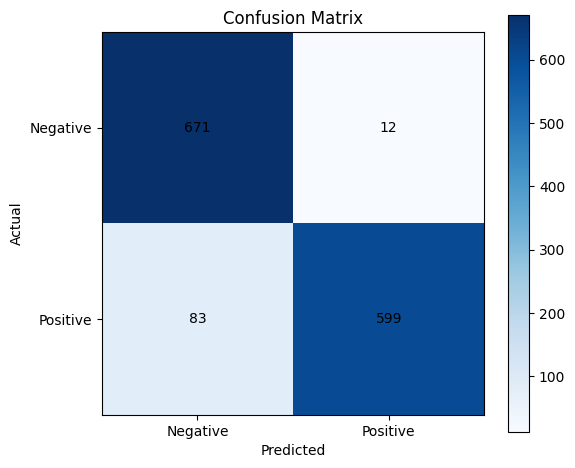

In [25]:
evaluator.plot_confusion_matrix(
    y_true=balanced_trainer.y_test,
    y_pred=y_pred,
    labels=["Negative", "Positive"]
)

# ROC Curve and AUC Analysis

This cell plots the Receiver Operating Characteristic (ROC) curve to evaluate the model’s ability to discriminate between classes.

# What this code does:
- Uses the **ModelEvaluator** class to generate the ROC curve.
- Computes prediction scores or probabilities from the trained model.
- Compares the true positive rate (TPR) against the false positive rate (FPR) across different decision thresholds.
- Calculates and visualizes the Area Under the Curve (AUC) as a summary performance metric.
- Provides insight into the trade-off between sensitivity and specificity.

# Output:
- A ROC curve plot with the corresponding AUC value, illustrating the model’s classification performance across thresholds.


2026-02-07 23:09:56,560 | INFO | evaluation.evaluator | Plotando curva ROC


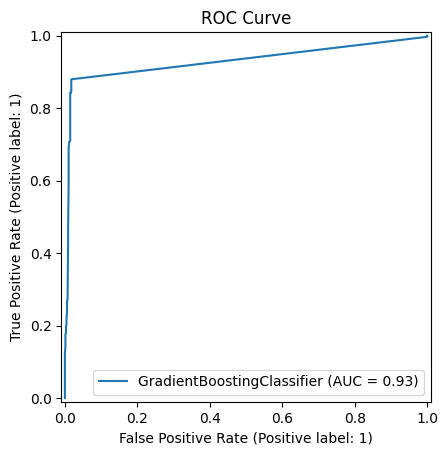

In [26]:
evaluator.plot_roc_curve(
    model=balanced_trainer.model,
    X_test=balanced_trainer.X_test,
    y_true=balanced_trainer.y_test
)

## Assigment: 

Try Oversampling Technique SMOTE, Compare and Contrast it with Undersampling Techniques and observe which one is better in our case
## Oversampling

**SMOTE (Synthetic Minority Oversampling TEchnique)** consists of synthesizing elements for the minority class, based on those that already exist. It works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [27]:
from preprocessing.apply_smote_oversampling import apply_smote_from_trainer
X_balanced, y_balanced = apply_smote_from_trainer(trainer)

2026-02-07 23:09:56,811 | INFO | preprocessing.apply_smote_oversampling | Iniciando over-sampling (SMOTE)
2026-02-07 23:09:57,093 | INFO | preprocessing.apply_smote_oversampling | SMOTE aplicado | antes=114801 | depois=222780


# Model Training with Balanced Dataset

This cell trains a machine learning model using a class-balanced dataset obtained through random undersampling.

# What this code does:
- Imports the **ModelTrainer** class, responsible for model training and experiment management.
- Imports the **ModelConfig** configuration object, which centralizes model hyperparameters and settings.
- Instantiates a new trainer using the defined configuration.
- Trains the model using the balanced feature matrix (`X_balanced`) and target vector (`y_balanced`).
- Produces a trained model that is less biased toward the majority class.

# Output:
- A trained machine learning model fitted on a balanced dataset, ready for evaluation and comparison with the original model.

In [28]:
from training.trainer import ModelTrainer
from config.settings import ModelConfig

balanced_trainer = ModelTrainer(ModelConfig())
balanced_trainer.train(X_balanced, y_balanced)

2026-02-07 23:09:57,111 | INFO | training.trainer | Target validado | Classes encontradas: [0 1]
2026-02-07 23:09:57,113 | INFO | training.trainer | Iniciando split de treino e teste (estratificado)
2026-02-07 23:09:57,295 | INFO | training.trainer | Distribuição de classes no treino: Counter({1: 89112, 0: 89112})
2026-02-07 23:09:57,307 | INFO | training.trainer | Distribuição de classes no teste: Counter({1: 22278, 0: 22278})
2026-02-07 23:09:57,308 | INFO | training.trainer | Inicializando GradientBoostingClassifier
2026-02-07 23:09:57,309 | INFO | training.trainer | Treinando modelo
2026-02-07 23:10:19,232 | INFO | training.trainer | Treinamento concluído com sucesso


(        cough  fever  sore_throat  shortness_of_breath  head_ache  \
 178861      1      0            1                    1          0   
 51097       0      0            0                    0          0   
 209133      0      0            0                    0          0   
 218686      0      0            0                    0          0   
 99419       0      0            0                    0          0   
 ...       ...    ...          ...                  ...        ...   
 193432      0      0            0                    0          0   
 158170      0      1            0                    0          1   
 74641       0      0            0                    0          0   
 17758       0      0            0                    0          0   
 110383      0      0            0                    0          0   
 
         age_60_and_above  gender  contact_with_confirmed  
 178861                 0       0                       0  
 51097                  0       1     

# Model Evaluation on Balanced Dataset

This cell evaluates the performance of the machine learning model trained on a balanced dataset.

# What this code does:
- Imports the **ModelEvaluator** class, responsible for computing standardized evaluation metrics.
- Instantiates the evaluator for model performance assessment.
- Generates predictions using the model trained on the balanced dataset.
- Compares predicted values with the true labels from the balanced test set.
- Computes evaluation metrics to assess model performance after class balancing.

# Output:
- A set of performance metrics that reflect the model’s behavior when trained on a balanced dataset, enabling comparison with the original (imbalanced) model.


In [29]:
from evaluation.evaluator import ModelEvaluator

evaluator = ModelEvaluator()

y_pred = balanced_trainer.model.predict(
    balanced_trainer.X_test
)

metrics = evaluator.evaluate_metrics(
    y_true=balanced_trainer.y_test,
    y_pred=y_pred
)

metrics

2026-02-07 23:10:19,427 | INFO | evaluation.evaluator | Calculando métricas de avaliação


{'accuracy': 0.8396848909237813,
 'precision': 0.95225004482161,
 'recall': 0.7152347607505162,
 'f1_score': 0.8168977980569583}

# Classification Report

This cell generates a detailed classification report to analyze the performance of the trained model for each target class.

# What this code does:
- Uses the **ModelEvaluator** class to compute a detailed classification report.
- Compares the model predictions with the true labels from the test dataset.
- Calculates class-wise metrics such as precision, recall, F1-score, and support.
- Maps numerical class labels to human-readable class names (`Negative`, `Positive`) for better interpretability.
- Prints the classification report for inspection and analysis.

# Output:
- A textual classification report summarizing the model’s performance for each class and overall averages.

In [30]:
report = evaluator.classification_report(
    y_true=balanced_trainer.y_test,
    y_pred=y_pred,
    target_names=["Negative", "Positive"]
)

print(report)

2026-02-07 23:10:19,491 | INFO | evaluation.evaluator | Gerando classification report


              precision    recall  f1-score   support

    Negative       0.77      0.96      0.86     22278
    Positive       0.95      0.72      0.82     22278

    accuracy                           0.84     44556
   macro avg       0.86      0.84      0.84     44556
weighted avg       0.86      0.84      0.84     44556



# Confusion Matrix Visualization

This cell visualizes the confusion matrix to provide an intuitive and interpretable overview of the model’s classification performance.

# What this code does:
- Uses the **ModelEvaluator** class to compute and plot the confusion matrix.
- Compares predicted labels against the true labels from the test dataset.
- Organizes results by class (`Negative`, `Positive`) to highlight correct and incorrect predictions.
- Displays a graphical representation of true positives, true negatives, false positives, and false negatives.
- Supports qualitative analysis of model strengths and weaknesses.

# Output:
- A confusion matrix plot that visually summarizes the classification results and error distribution.


2026-02-07 23:10:19,542 | INFO | evaluation.evaluator | Plotando matriz de confusão


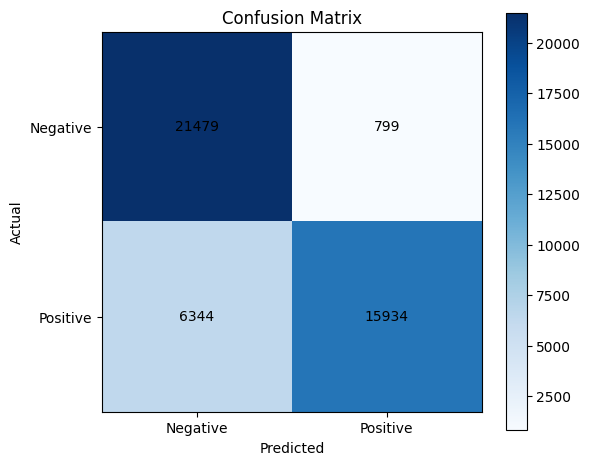

In [31]:
evaluator.plot_confusion_matrix(
    y_true=balanced_trainer.y_test,
    y_pred=y_pred,
    labels=["Negative", "Positive"]
)

# ROC Curve and AUC Analysis

This cell plots the Receiver Operating Characteristic (ROC) curve to evaluate the model’s ability to discriminate between classes.

# What this code does:
- Uses the **ModelEvaluator** class to generate the ROC curve.
- Computes prediction scores or probabilities from the trained model.
- Compares the true positive rate (TPR) against the false positive rate (FPR) across different decision thresholds.
- Calculates and visualizes the Area Under the Curve (AUC) as a summary performance metric.
- Provides insight into the trade-off between sensitivity and specificity.

# Output:
- A ROC curve plot with the corresponding AUC value, illustrating the model’s classification performance across thresholds.


2026-02-07 23:10:19,840 | INFO | evaluation.evaluator | Plotando curva ROC


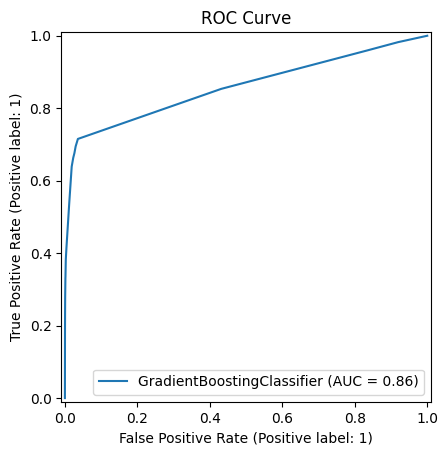

In [32]:
evaluator.plot_roc_curve(
    model=balanced_trainer.model,
    X_test=balanced_trainer.X_test,
    y_true=balanced_trainer.y_test
)

# Path Persistence

# Model Persistence and Saving

This cell saves the trained machine learning model to disk for future reuse, inference, or deployment.

# What this code does:
- Imports the **save_model** utility function, responsible for model persistence.
- Serializes the trained model using a standardized and reusable persistence mechanism.
- Stores the model file on disk with a clear and descriptive filename.
- Ensures reproducibility by allowing the trained model to be reloaded without retraining.
- Logs the saving process and handles potential errors during serialization.

# Output:
- A serialized model file (`.sav`) stored locally, ready to be loaded for inference, evaluation, or deployment.


In [33]:
from persistence.model_persistence import save_model

save_model(
    model=trainer.model,
    filename="finalized_model_classifying_symptoms.sav"
)

2026-02-07 23:11:13,058 | INFO | persistence.model_persistence | Iniciando salvamento do modelo
2026-02-07 23:11:13,072 | INFO | persistence.model_persistence | Modelo salvo em models\finalized_model_classifying_symptoms.sav


WindowsPath('models/finalized_model_classifying_symptoms.sav')